=== DATASET OVERVIEW ===
Dataset shape: (962, 2)
Columns: ['Category', 'Resume']

Category Distribution:
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64


C:\Users\arjun\AppData\Local\Temp\ipykernel_22984\1797124985.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')


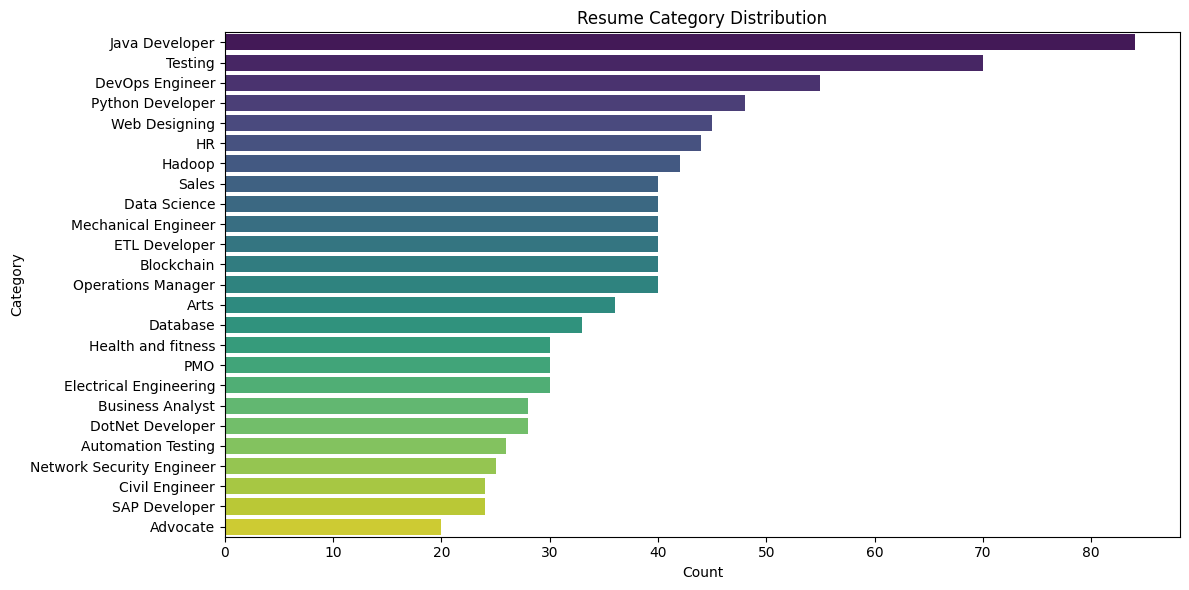


Average resume length: 3160 characters
Shortest resume: 142 characters
Longest resume: 14816 characters


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# Load the dataset
df = pd.read_csv('UpdatedResumeDataSet.csv')

print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nCategory Distribution:")
print(df['Category'].value_counts())

# Visualize category distribution
plt.figure(figsize=(12, 6))
category_counts = df['Category'].value_counts()
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.title('Resume Category Distribution')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

# Resume length analysis
df['Resume_Length'] = df['Resume'].apply(len)
print(f"\nAverage resume length: {df['Resume_Length'].mean():.0f} characters")
print(f"Shortest resume: {df['Resume_Length'].min()} characters")
print(f"Longest resume: {df['Resume_Length'].max()} characters")

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

def clean_resume_text(text):
    """
    Clean resume text by removing special characters, extra spaces, etc.
    """
    if pd.isna(text):
        return ""
    
    # Remove special characters but keep basic punctuation
    text = re.sub(r'[^\w\s\.\,\!\\?]', ' ', str(text))
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    return text.strip().lower()

def extract_skills_section(text):
    """
    Extract skills section from resume text
    """
    skills_keywords = ['skills', 'technical skills', 'programming', 'languages', 'tools']
    lines = text.split('\n')
    
    skills_section = []
    in_skills_section = False
    
    for line in lines:
        line_lower = line.lower()
        
        # Check if we're entering skills section
        if any(keyword in line_lower for keyword in skills_keywords):
            in_skills_section = True
            continue
        
        # If in skills section and line contains meaningful content
        if in_skills_section and len(line.strip()) > 3:
            skills_section.append(line.strip())
            
        # Exit skills section when we hit another major section
        if in_skills_section and any(section in line_lower for section in ['education', 'experience', 'company', 'projects']):
            break
    
    return ' '.join(skills_section)

# Apply cleaning
df['Cleaned_Resume'] = df['Resume'].apply(clean_resume_text)
df['Skills_Section'] = df['Resume'].apply(extract_skills_section)

print("=== DATA CLEANING COMPLETED ===")
print(f"Sample cleaned resume (first 500 chars):")
print(df['Cleaned_Resume'].iloc[0][:500])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arjun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arjun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


=== DATA CLEANING COMPLETED ===
Sample cleaned resume (first 500 chars):
skills programming languages python pandas, numpy, scipy, scikit learn, matplotlib , sql, java, javascript jquery. machine learning regression, svm, naã ve bayes, knn, random forest, decision trees, boosting techniques, cluster analysis, word embedding, sentiment analysis, natural language processing, dimensionality reduction, topic modelling lda, nmf , pca neural nets. database visualizations mysql, sqlserver, cassandra, hbase, elasticsearch d3.js, dc.js, plotly, kibana, matplotlib, ggplot, tab


=== TOP 20 MOST FREQUENT SKILLS ===
sql: 299
java: 273
mysql: 216
html: 185
python: 176
oracle: 175
javascript: 151
excel: 129
css: 115
angular: 75
aws: 75
machine learning: 56
git: 56
hadoop: 46
spark: 46
hive: 46
numpy: 44
django: 44
postgresql: 39
mongodb: 36


C:\Users\arjun\AppData\Local\Temp\ipykernel_22984\2776764464.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_skills.values()), y=list(top_skills.keys()), palette='rocket')


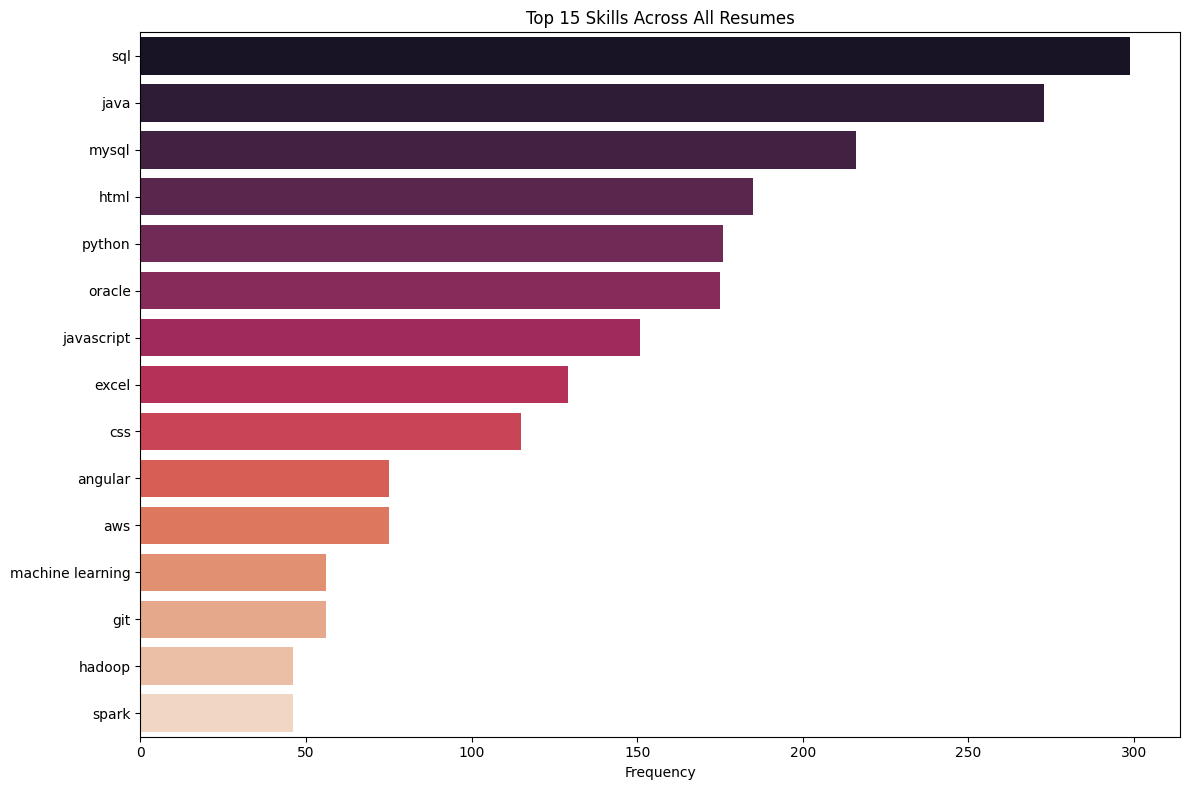


=== SKILLS BY CATEGORY ===

Data Science - Top Skills:
  python: 40
  machine learning: 36
  sql: 20
  deep learning: 20
  java: 16

HR - Top Skills:
  excel: 4
  java: 4

Advocate - Top Skills:

Arts - Top Skills:

Web Designing - Top Skills:
  javascript: 36
  angular: 18
  java: 18
  sql: 9
  html: 9

Mechanical Engineer - Top Skills:
  excel: 8

Sales - Top Skills:
  excel: 8
  sql: 8

Health and fitness - Top Skills:
  excel: 5

Civil Engineer - Top Skills:
  excel: 4

Java Developer - Top Skills:
  java: 84
  javascript: 42
  oracle: 42
  sql: 36
  mysql: 36

Business Analyst - Top Skills:
  excel: 24
  java: 12
  html: 12
  sql: 8
  javascript: 6

SAP Developer - Top Skills:
  sql: 12
  python: 4
  java: 4
  oracle: 4
  power bi: 4

Automation Testing - Top Skills:
  sql: 12
  html: 12
  javascript: 10
  oracle: 10
  python: 8

Electrical Engineering - Top Skills:

Operations Manager - Top Skills:
  sql: 10

Python Developer - Top Skills:
  python: 48
  mysql: 40
  numpy: 32
  

In [3]:
def extract_common_skills(text):
    """
    Extract common technical skills from resume text
    """
    # Common technical skills patterns
    technical_skills = [
        'python', 'java', 'javascript', 'sql', 'r programming', 'c\\+\\+', 'c#',
        'machine learning', 'deep learning', 'nlp', 'natural language processing',
        'tableau', 'power bi', 'excel', 'aws', 'azure', 'google cloud',
        'tensorflow', 'pytorch', 'keras', 'scikit-learn', 'pandas', 'numpy',
        'hadoop', 'spark', 'hive', 'docker', 'kubernetes', 'git',
        'html', 'css', 'react', 'angular', 'node.js', 'django', 'flask',
        'mysql', 'mongodb', 'postgresql', 'oracle', 'nosql'
    ]
    
    found_skills = []
    for skill in technical_skills:
        if re.search(r'\b' + skill + r'\b', text.lower()):
            found_skills.append(skill)
    
    return found_skills

# Extract skills from all resumes
all_skills = []
for resume in df['Cleaned_Resume']:
    all_skills.extend(extract_common_skills(resume))

# Count skill frequency
skill_counts = Counter(all_skills)

# Display top skills
print("=== TOP 20 MOST FREQUENT SKILLS ===")
for skill, count in skill_counts.most_common(20):
    print(f"{skill}: {count}")

# Visualize top skills
plt.figure(figsize=(12, 8))
top_skills = dict(skill_counts.most_common(15))
sns.barplot(x=list(top_skills.values()), y=list(top_skills.keys()), palette='rocket')
plt.title('Top 15 Skills Across All Resumes')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

# Skills by category
print("\n=== SKILLS BY CATEGORY ===")
for category in df['Category'].unique():
    category_skills = []
    category_resumes = df[df['Category'] == category]['Cleaned_Resume']
    
    for resume in category_resumes:
        category_skills.extend(extract_common_skills(resume))
    
    skill_counts_category = Counter(category_skills)
    print(f"\n{category} - Top Skills:")
    for skill, count in skill_counts_category.most_common(5):
        print(f"  {skill}: {count}")

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Prepare data for classification
df_classification = df[df['Category'].isin(['Data Science', 'HR', 'Advocate', 'Arts'])]  # Focus on main categories

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_classification['Category'])

# Create TF-IDF features
tfidf = TfidfVectorizer(
    max_features=1000,
    stop_words='english',
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.8
)

X = tfidf.fit_transform(df_classification['Cleaned_Resume'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"=== CLASSIFICATION MODEL RESULTS ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Feature importance (most important words for classification)
feature_names = tfidf.get_feature_names_out()
importances = classifier.feature_importances_
indices = importances.argsort()[::-1][:20]

print("\nTop 20 Most Important Features for Classification:")
for i in indices:
    print(f"  {feature_names[i]}: {importances[i]:.4f}")

=== CLASSIFICATION MODEL RESULTS ===
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

    Advocate       1.00      1.00      1.00         4
        Arts       1.00      1.00      1.00         7
Data Science       1.00      1.00      1.00         8
          HR       1.00      1.00      1.00         9

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28


Top 20 Most Important Features for Classification:
  arts: 0.0511
  hr: 0.0510
  data: 0.0415
  hr skill: 0.0282
  python: 0.0273
  advocate: 0.0268
  law: 0.0235
  maharashtra: 0.0229
  data science: 0.0204
  machine: 0.0184
  university: 0.0181
  advocate skill: 0.0165
  months python: 0.0161
  analysis: 0.0154
  machine learning: 0.0146
  learning: 0.0139
  education details: 0.0137
  python exprience: 0.0135
  exprience: 0.0133
  legal: 0.0132


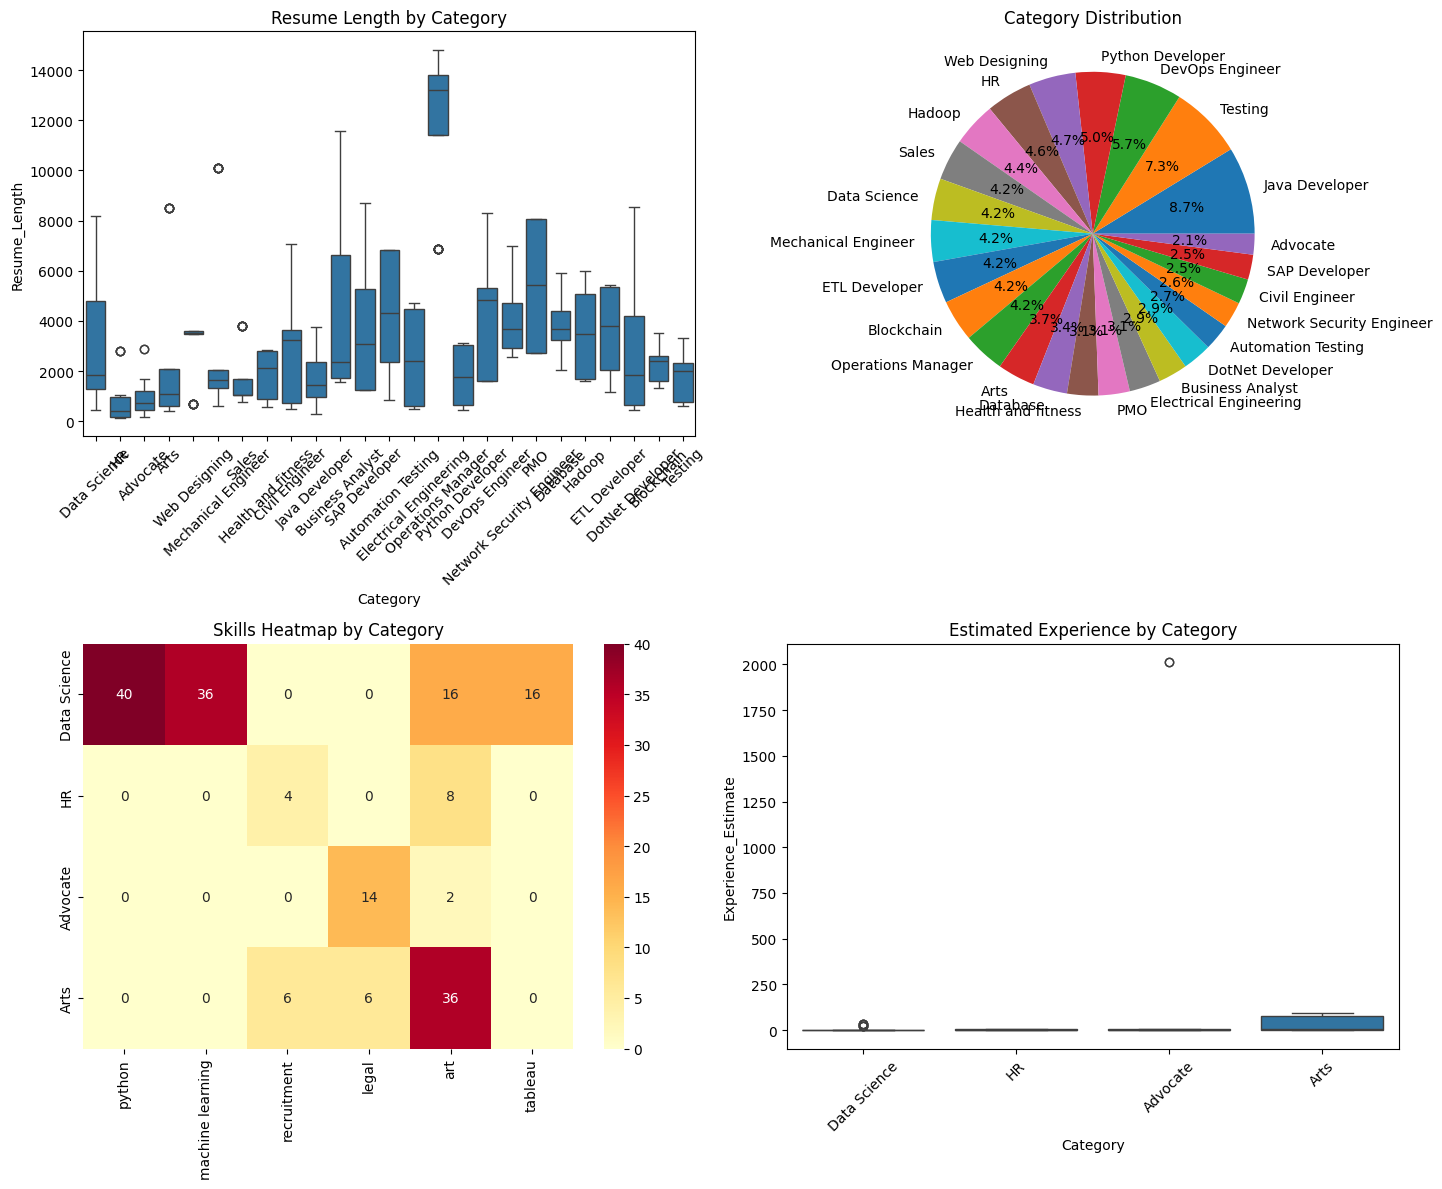

In [5]:
# Create comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Resume length by category
df['Resume_Length'] = df['Resume'].apply(len)
sns.boxplot(data=df, x='Category', y='Resume_Length', ax=axes[0,0])
axes[0,0].set_title('Resume Length by Category')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Category distribution
category_counts = df['Category'].value_counts()
axes[0,1].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
axes[0,1].set_title('Category Distribution')

# 3. Skills heatmap by category
category_skills_matrix = []
for category in ['Data Science', 'HR', 'Advocate', 'Arts']:
    category_skills = []
    category_resumes = df[df['Category'] == category]['Cleaned_Resume']
    
    for skill in ['python', 'machine learning', 'recruitment', 'legal', 'art', 'tableau']:
        count = sum(1 for resume in category_resumes if skill in resume.lower())
        category_skills.append(count)
    
    category_skills_matrix.append(category_skills)

skills_heatmap_df = pd.DataFrame(
    category_skills_matrix,
    index=['Data Science', 'HR', 'Advocate', 'Arts'],
    columns=['python', 'machine learning', 'recruitment', 'legal', 'art', 'tableau']
)

sns.heatmap(skills_heatmap_df, annot=True, cmap='YlOrRd', ax=axes[1,0])
axes[1,0].set_title('Skills Heatmap by Category')

# 4. Experience level analysis (simplified)
def extract_experience(text):
    """Extract approximate experience from resume"""
    experience_patterns = [
        r'(\d+)\s*years?',
        r'(\d+)\s*months?',
        r'experience.*?(\d+)'
    ]
    
    for pattern in experience_patterns:
        matches = re.findall(pattern, text.lower())
        if matches:
            return max([int(m) for m in matches if m.isdigit()], default=0)
    return 0

df['Experience_Estimate'] = df['Cleaned_Resume'].apply(extract_experience)
sns.boxplot(data=df[df['Category'].isin(['Data Science', 'HR', 'Advocate', 'Arts'])], 
            x='Category', y='Experience_Estimate', ax=axes[1,1])
axes[1,1].set_title('Estimated Experience by Category')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [6]:
# Create enhanced dataset with extracted features
enhanced_df = df.copy()

# Add extracted features
enhanced_df['Has_Python'] = enhanced_df['Cleaned_Resume'].str.contains('python', case=False)
enhanced_df['Has_ML'] = enhanced_df['Cleaned_Resume'].str.contains('machine learning', case=False)
enhanced_df['Has_SQL'] = enhanced_df['Cleaned_Resume'].str.contains('sql', case=False)
enhanced_df['Skill_Count'] = enhanced_df['Cleaned_Resume'].apply(lambda x: len(extract_common_skills(x)))

# Save processed data
enhanced_df.to_csv('Processed_Resume_DataSet.csv', index=False)

# Save skill frequency data
skill_df = pd.DataFrame(skill_counts.most_common(), columns=['Skill', 'Frequency'])
skill_df.to_csv('Skill_Frequency_Analysis.csv', index=False)

print("=== EXPORT COMPLETED ===")
print("Files created:")
print("1. Processed_Resume_DataSet.csv - Enhanced dataset with extracted features")
print("2. Skill_Frequency_Analysis.csv - Skill frequency analysis")
print(f"3. Original dataset shape: {df.shape}")
print(f"4. Processed dataset shape: {enhanced_df.shape}")

# Final summary
print("\n=== FINAL SUMMARY ===")
print(f"Total resumes: {len(df)}")
print(f"Categories: {df['Category'].nunique()}")
print(f"Most common category: {df['Category'].mode().iloc[0]}")
print(f"Classification model accuracy: {accuracy:.4f}")
print(f"Most frequent skill: {skill_counts.most_common(1)[0][0]}")

=== EXPORT COMPLETED ===
Files created:
1. Processed_Resume_DataSet.csv - Enhanced dataset with extracted features
2. Skill_Frequency_Analysis.csv - Skill frequency analysis
3. Original dataset shape: (962, 6)
4. Processed dataset shape: (962, 10)

=== FINAL SUMMARY ===
Total resumes: 962
Categories: 25
Most common category: Java Developer
Classification model accuracy: 1.0000
Most frequent skill: sql
